<a href="https://colab.research.google.com/github/drwbkr1/Grad504-Hierarchical-Cluster-Project/blob/main/GRAD504_HC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
plants= ("/content/drive/MyDrive/Colab Notebooks/datasets/plants.data")

'''After discovering the correct encoding, I noticed the loader didn't like the
different number of datapoints in each line. So now I'm one-hot encoding the
dataset right out of the box

We're going to split the plants from the states, then one-hot encode the states.
We'll add the plant's back to the dataframe after the one-hot encoding.'''

plants_list= []
states_list= []

with open(plants, encoding='ISO-8859-1') as file:
  for line in file:
    items= line.strip().split(",") #turn each line into a list
    plants_list.append(items[0])            #reorganize the list into respective variables
    states_list.append(items[1:])

#states_list[:10]


In [ ]:
mlb= MultiLabelBinarizer()

states_ohe= mlb.fit_transform(states_list)

df= pd.DataFrame(states_ohe, columns= mlb.classes_, index= plants_list)
df= df.rename(columns= {"index" : "Flowers"})
#df.head(10)


In [ ]:
df.shape

(34781, 70)

In [ ]:
'''Oh boy, 34000 flower types in 70 regions. That's 2.38 million combinations.
We have our work cut out for us'''

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


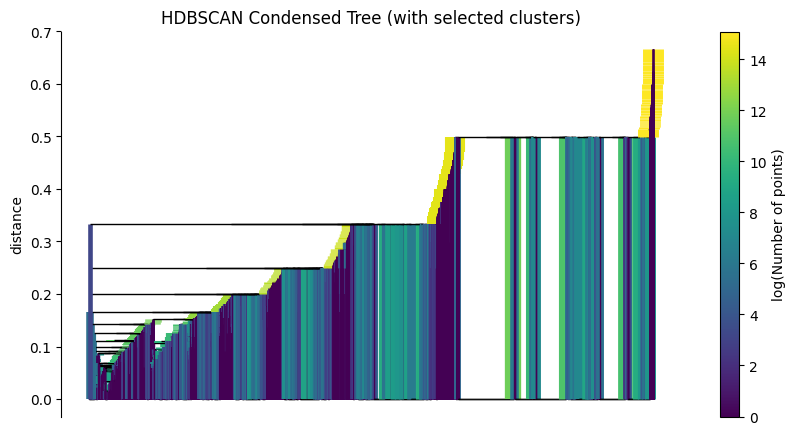

In [51]:
from hdbscan.hdbscan_ import HDBSCAN
import matplotlib.pyplot as plt

clusterer= HDBSCAN(min_cluster_size= 1000,
                   min_samples=3,
                   metric= 'jaccard',
                   core_dist_n_jobs= -3
                   )

clusterer.fit(df)

plt.figure(figsize=(10, 5))
#clusterer.condensed_tree_.plot()
clusterer.single_linkage_tree_.plot()
plt.title("HDBSCAN Condensed Tree (with selected clusters)")
plt.show()

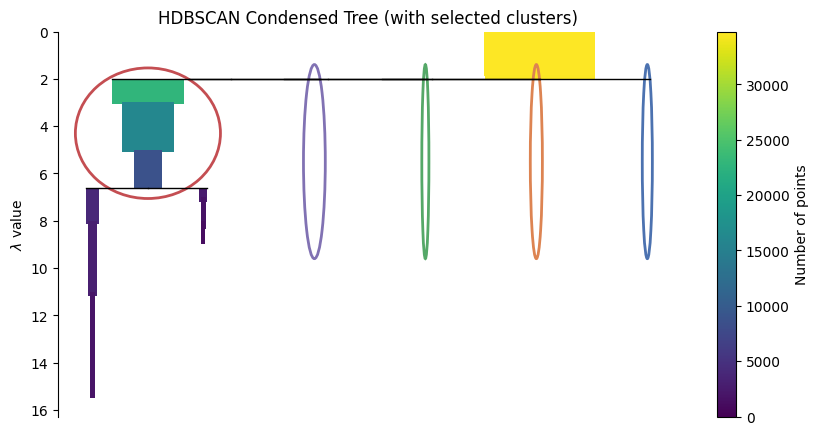

In [55]:
plt.figure(figsize=(10, 5))
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8),
                               max_rectangles_per_icicle= 3,
                               )
#clusterer.single_linkage_tree_.plot()
plt.title("HDBSCAN Condensed Tree (with selected clusters)")
plt.show()

In [53]:
labels= clusterer.labels_

unique_labels, count= np.unique(labels, return_counts= True)
for label, cnt in zip(unique_labels, count):
  name= (f"Cluster {label}") if label != -1 else "Noise"
  print(f"{name}: {cnt} points")

Noise: 4035 points
Cluster 0: 1582 points
Cluster 1: 1896 points
Cluster 2: 1113 points
Cluster 3: 22735 points
Cluster 4: 3420 points
